In [36]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

#read the dataset
df = pd.read_excel("SixHKStockData.xls", "Stacked")

In [37]:
##Data cleaning

In [38]:
# Display complete output in Jupyter notebook
pd.set_option("display.max_rows", None, "display.max_columns", None)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11068 entries, 0 to 11067
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   stock_id  11068 non-null  int64         
 1   tdate     11068 non-null  datetime64[ns]
 2   open      11068 non-null  float64       
 3   close     11068 non-null  float64       
 4   high      11068 non-null  float64       
 5   low       11068 non-null  float64       
 6   volume    11068 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 605.4 KB


In [39]:
#find zero value (missing data)
(df == 0).sum()

stock_id      0
tdate         0
open          0
close         0
high          0
low           0
volume      640
dtype: int64

In [40]:
# drop non-numerical attributes
df = df.drop(columns=['tdate'])

In [41]:
# drop primary key 
df = df.drop(columns=['stock_id'])

In [42]:
##Feature Engineering
df['1DayMovement'] = (df['close']-df['open']) 
df['Movement%'] = df['1DayMovement'] / df['open']

In [43]:
##Clustering

In [44]:
# Case: 1DayMovement vs Movement%

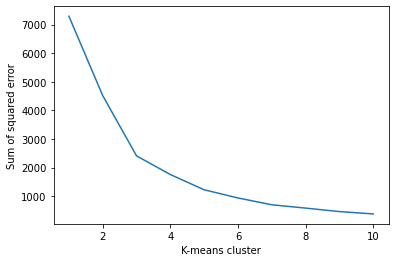

In [45]:
# find the suitable k-means cluster by sse
sse = []
k_rng = range(1,11)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Movement%','1DayMovement']])
    sse.append(km.inertia_)

plt.xlabel('K-means cluster')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [46]:
# define k-means clusters
km = KMeans(n_clusters=5)
km

KMeans(n_clusters=5)

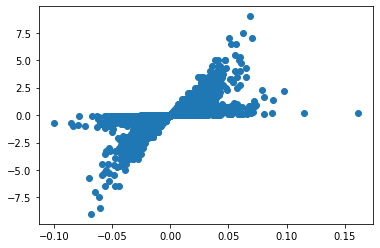

In [47]:
plt.scatter(df['Movement%'], df['1DayMovement'])

In [48]:
y_predicted = km.fit_predict(df[['Movement%', '1DayMovement']])
y_predicted

array([1, 1, 1, ..., 0, 0, 0])

In [49]:
df['cluster'] = y_predicted
df.head()

,open,close,high,low,volume,1DayMovement,Movement%,cluster
0,100.0,98.00,101.0,98.00,2283100,-2.00,-0.020000,1
1,93.5,91.25,95.0,90.75,4330100,-2.25,-0.024064,1
2,92.0,86.75,92.5,85.00,7462000,-5.25,-0.057065,1
3,88.0,88.50,89.0,86.50,4323800,0.50,0.005682,0
4,91.5,89.25,93.0,89.25,3713200,-2.25,-0.024590,1


In [50]:
km.cluster_centers_

array([[ 7.93917464e-04,  3.64364887e-02],
       [-2.95132597e-02, -2.60259740e+00],
       [-1.42962272e-02, -7.95624257e-01],
       [ 1.77474967e-02,  1.10776945e+00],
       [ 3.69305847e-02,  3.13796296e+00]])

In [51]:
# spilt df by df.cluster
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]

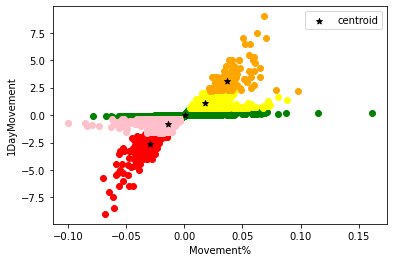

In [52]:
# visualized graph for clustering result
plt.scatter(df1['Movement%'], df1['1DayMovement'],color='green')
plt.scatter(df2['Movement%'], df2['1DayMovement'],color='red')
plt.scatter(df3['Movement%'], df3['1DayMovement'],color='pink')
plt.scatter(df4['Movement%'], df4['1DayMovement'],color='yellow')
plt.scatter(df5['Movement%'], df5['1DayMovement'],color='orange')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.xlabel('Movement%')
plt.ylabel('1DayMovement')
plt.legend()

In [53]:
# Case: close vs 1DayMovement

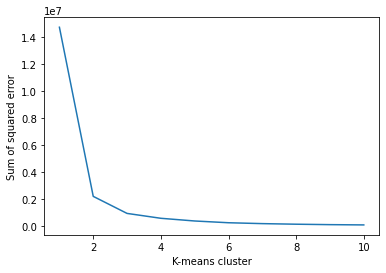

In [54]:
# find the suitable k-means cluster by sse
sse = []
k_rng = range(1,11)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['close','1DayMovement']])
    sse.append(km.inertia_)

plt.xlabel('K-means cluster')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [55]:
#define k-means clusters
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

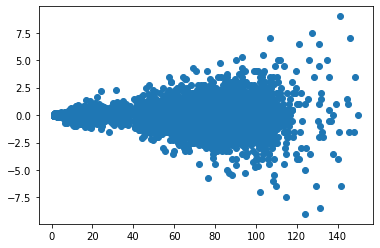

In [56]:
#df['1DayMovement'] = df['close']-df['open'] 
plt.scatter(df.close, df['1DayMovement'])

In [57]:
y_predicted = km.fit_predict(df[['close', '1DayMovement']])
y_predicted

array([1, 1, 1, ..., 0, 0, 0])

In [58]:
df['cluster'] = y_predicted
df.head()

,open,close,high,low,volume,1DayMovement,Movement%,cluster
0,100.0,98.00,101.0,98.00,2283100,-2.00,-0.020000,1
1,93.5,91.25,95.0,90.75,4330100,-2.25,-0.024064,1
2,92.0,86.75,92.5,85.00,7462000,-5.25,-0.057065,1
3,88.0,88.50,89.0,86.50,4323800,0.50,0.005682,1
4,91.5,89.25,93.0,89.25,3713200,-2.25,-0.024590,1


In [59]:
km.cluster_centers_

array([[ 6.32314366e+01, -3.51679104e-02],
       [ 9.41598145e+01, -2.09612142e-02],
       [ 1.24261571e+01, -1.31108243e-03]])

In [60]:
# spilt df by df.cluster
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

In [61]:
# check intra-similiarity
from sklearn.metrics import  pairwise 

sim0_intra = pairwise.pairwise_distances(df1, metric='euclidean')
sim1_intra = pairwise.pairwise_distances(df2, metric='euclidean')
sim2_intra = pairwise.pairwise_distances(df3, metric='euclidean')

similarityClass0 = sim0_intra.mean()
similarityClass1 = sim1_intra.mean()
similarityClass2 = sim2_intra.mean()

print("intra-similiarity in df1: "+str(similarityClass0))
print("intra-similiarity in df2: "+str(similarityClass1))
print("intra-similiarity in df3: "+str(similarityClass2))

intra-similiarity in df1: 5085644.406165919
intra-similiarity in df2: 3137787.541677492
intra-similiarity in df3: 54752013.30527215


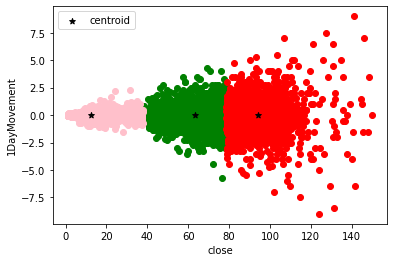

In [62]:
# visualized graph for clustering result
plt.scatter(df1.close,df1['1DayMovement'],color='green')
plt.scatter(df2.close,df2['1DayMovement'],color='red')
plt.scatter(df3.close,df3['1DayMovement'],color='pink')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.xlabel('close')
plt.ylabel('1DayMovement')
plt.legend()

In [63]:
#After transforming

In [64]:
scaler = MinMaxScaler()

scaler.fit(df[['1DayMovement']])
df['1DayMovement'] = scaler.transform(df[['1DayMovement']])

scaler.fit(df[['close']])
df['close'] = scaler.transform(df[['close']])

In [65]:
df.head()

,open,close,high,low,volume,1DayMovement,Movement%,cluster
0,100.0,0.650749,101.0,98.00,2283100,0.388889,-0.020000,1
1,93.5,0.605413,95.0,90.75,4330100,0.375000,-0.024064,1
2,92.0,0.575190,92.5,85.00,7462000,0.208333,-0.057065,1
3,88.0,0.586943,89.0,86.50,4323800,0.527778,0.005682,1
4,91.5,0.591981,93.0,89.25,3713200,0.375000,-0.024590,1


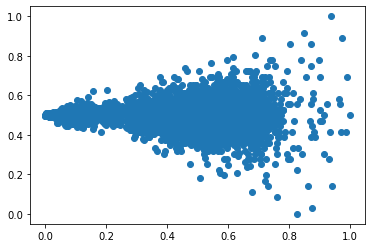

In [66]:
plt.scatter(df.close, df['1DayMovement'])

In [67]:
y_predicted = km.fit_predict(df[['close', '1DayMovement']])
y_predicted

array([1, 1, 1, ..., 2, 2, 2])

In [68]:
df['cluster'] = y_predicted
df.head()

,open,close,high,low,volume,1DayMovement,Movement%,cluster
0,100.0,0.650749,101.0,98.00,2283100,0.388889,-0.020000,1
1,93.5,0.605413,95.0,90.75,4330100,0.375000,-0.024064,1
2,92.0,0.575190,92.5,85.00,7462000,0.208333,-0.057065,1
3,88.0,0.586943,89.0,86.50,4323800,0.527778,0.005682,1
4,91.5,0.591981,93.0,89.25,3713200,0.375000,-0.024590,1


In [69]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

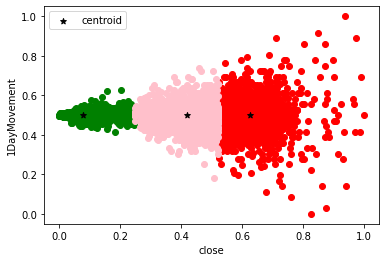

In [70]:
# visualized graph for clustering result
plt.scatter(df1.close,df1['1DayMovement'],color='green')
plt.scatter(df2.close,df2['1DayMovement'],color='red')
plt.scatter(df3.close,df3['1DayMovement'],color='pink')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.xlabel('close')
plt.ylabel('1DayMovement')
plt.legend()